# Coloured wind flags plotting

This is one cell notebook example that will help you plot coloured wind flags from grib file using Magics.  
Simple way to colour wind is by intensity and it is a default method in Magics. We will use advanced wind plotting method, by setting **wind_advanced_method** to **"on"** and then define colours and levels similar to setting contours.

At ECMWF  

#### From your workstation:
module swap (or load) Magics/new   
jupyter notebook  

load this notebook


List of all **mwind** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Wind+Plotting "Wind parameters").

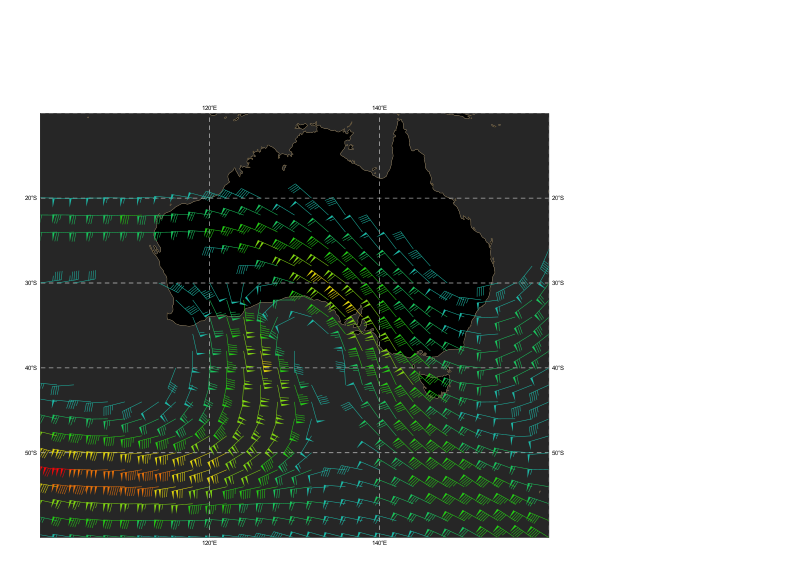

In [1]:
import Magics.macro as magics

# Setting the projection
australia = magics.mmap(
    subpage_upper_right_longitude  = 160.00,
    subpage_upper_right_latitude   = -10.00,
    subpage_lower_left_latitude    = -60.00,
    subpage_lower_left_longitude   = 100.00,
    subpage_map_projection         = "cylindrical",
    subpage_clipping               = "on",
    page_id_line                   = "off")

# Defining the coastlines
black_background = magics.mcoast(
    map_coastline_sea_shade         = "on",
    map_coastline_land_shade_colour = "black",
    map_grid                        = "on",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "white",
    map_coastline_land_shade        = "on",
    map_coastline_sea_shade_colour  = "rgb(0.15,0.15,0.15)",
    map_label                       = "on",
    map_coastline_colour            = "tan")

# Load the grib data
wind_from_grib = magics.mgrib(
    grib_input_file_name = 'uv200.grib', 
    grib_wind_position_1 = 1,
    grib_wind_position_2 = 2)

# Defining Wind flags
coloured_flags = magics.mwind(
    legend                                   = 'off',
    wind_field_type                          = 'flags',
    wind_flag_origin_marker                  = 'off',
    wind_flag_length                         = 0.8,
    wind_flag_min_speed                      = 10.0,
    wind_thinning_factor                     = 4.,
    wind_advanced_method                     = 'on',
    wind_advanced_colour_selection_type      = 'interval',
    wind_advanced_colour_level_interval      = 10.0,
    wind_advanced_colour_reference_level     = 20.0,
    wind_advanced_colour_max_value           = 100.0,
    wind_advanced_colour_min_value           = 20.0,
    wind_advanced_colour_table_colour_method = 'calculate',
    wind_advanced_colour_direction           = 'clockwise',
    wind_advanced_colour_min_level_colour    = 'turquoise',
    wind_advanced_colour_max_level_colour    = 'purple_red')

magics.plot(australia, black_background, wind_from_grib, coloured_flags)